<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Collecting Job Data Using APIs**


Estimated time needed: **45 to 60** minutes


## Objectives


After completing this lab, you will be able to:


*   Collect job data from Jobs API
*   Store the collected data into an excel spreadsheet.


><strong>Note: Before starting with the assignment make sure to read all the instructions and then move ahead with the coding part.</strong>


#### Instructions


To run the actual lab, firstly you need to click on the [Jobs_API](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Jobs_API.ipynb) notebook link. The file contains flask code which is required to run the Jobs API data.

Now, to run the code in the file that opens up follow the below steps.

Step1: Download the file. 

Step2: Upload it on the IBM Watson studio. (If IBM Watson Cloud service does not work in your system, follow the alternate Step 2 below)

Step2(alternate): Upload it in your SN labs environment using the upload button which is highlighted in red in the image below:
Remember to upload this Jobs_API file in the same folder as your current .ipynb file

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Upload.PNG">

Step3:  Run all the cells of the Jobs_API file. (Even if you receive an asterik sign after running the last cell, the code works fine.)

If you want to learn more about flask, which is optional, you can click on this link [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/FLASK_API.md.html).

Once you run the flask code, you can start with your assignment.


## Dataset Used in this Assignment

The dataset used in this lab comes from the following source: https://www.kaggle.com/promptcloud/jobs-on-naukricom under the under a **Public Domain license**.

> Note: We are using a modified subset of that dataset for the lab, so to follow the lab instructions successfully please use the dataset provided with the lab, rather than the dataset from the original source.

The original dataset is a csv. We have converted the csv to json as per the requirement of the lab.


## Warm-Up Exercise


Before you attempt the actual lab, here is a fully solved warmup exercise that will help you to learn how to access an API.


Using an API, let us find out who currently are on the International Space Station (ISS).<br> The API at [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) gives us the information of astronauts currently on ISS in json format.<br>
You can read more about this API at [http://open-notify.org/Open-Notify-API/People-In-Space/](http://open-notify.org/Open-Notify-API/People-In-Space?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


In [ ]:
import requests # you need this module to make an API call
import pandas as pd

In [7]:
api_url = "http://api.open-notify.org/astros.json" # this url gives use the astronaut data

In [8]:
response = requests.get(api_url) # Call the API using the get method and store the
                                # output of the API call in a variable called response.

In [9]:
if response.ok:             # if all is well() no errors, no network timeouts)
    data = response.json()  # store the result in json format in a variable called data
                            # the variable data is of type dictionary.

In [10]:
print(data)   # print the data just to check the output or for debugging

{'message': 'success', 'number': 10, 'people': [{'craft': 'ISS', 'name': 'Sergey Prokopyev'}, {'craft': 'ISS', 'name': 'Dmitry Petelin'}, {'craft': 'ISS', 'name': 'Frank Rubio'}, {'craft': 'Shenzhou 15', 'name': 'Fei Junlong'}, {'craft': 'Shenzhou 15', 'name': 'Deng Qingming'}, {'craft': 'Shenzhou 15', 'name': 'Zhang Lu'}, {'craft': 'ISS', 'name': 'Stephen Bowen'}, {'craft': 'ISS', 'name': 'Warren Hoburg'}, {'craft': 'ISS', 'name': 'Sultan Alneyadi'}, {'craft': 'ISS', 'name': 'Andrey Fedyaev'}]}


Print the number of astronauts currently on ISS.


In [11]:
print(data.get('number'))

10


Print the names of the astronauts currently on ISS.


In [12]:
astronauts = data.get('people')
print (len(astronauts))
print("There are {} astronauts on ISS".format(len(astronauts)))
print("And their names are :")
for astronaut in astronauts:
    print(astronaut.get('name'))

10
There are 10 astronauts on ISS
And their names are :
Sergey Prokopyev
Dmitry Petelin
Frank Rubio
Fei Junlong
Deng Qingming
Zhang Lu
Stephen Bowen
Warren Hoburg
Sultan Alneyadi
Andrey Fedyaev


Hope the warmup was helpful. Good luck with your next lab!


## Lab: Collect Jobs Data using Jobs API


### Objective: Determine the number of jobs currently open for various technologies  and for various locations


Collect the number of job postings for the following locations using the API:

* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit


In [ ]:
#Import required libraries
import pandas as pd
import json

#### Write a function to get the number of jobs for the Python technology.<br>
> Note: While using the lab you need to pass the **payload** information for the **params** attribute in the form of **key** **value** pairs.
  Refer the ungraded **rest api lab** in the course **Python for Data Science, AI & Development**  <a href="https://www.coursera.org/learn/python-for-applied-data-science-ai/ungradedLti/P6sW8/hands-on-lab-access-rest-apis-request-http?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01">link</a>
  
 ##### The keys in the json are 
 * Job Title
 
 * Job Experience Required
 
 * Key Skills
 
 * Role Category
 
 * Location
 
 * Functional Area
 
 * Industry
 
 * Role 
 
You can also view  the json file contents  from the following <a href = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json">json</a> URL.


In [ ]:
api_url="http://127.0.0.1:5000/data"
def get_number_of_jobs_T(technology):
    payload={"Key Skills":technology}
    response=requests.get(api_url,params=payload)
    if response.ok:
        data = response.json()
    number_of_jobs = len(data)
    return technology,number_of_jobs

Calling the function for Python and checking if it works.


In [ ]:
get_number_of_jobs_T("Python")

#### Write a function to find number of jobs in US for a location of your choice


In [22]:
def get_number_of_jobs_L(location):
    payload={"Location":location}
    r=requests.get(api_url,params=payload)
    response=requests.get(api_url,params=payload)
    if response.ok:
        data = response.json()
    number_of_jobs = len(data)
    return location, number_of_jobs

Call the function for Los Angeles and check if it is working.




In [23]:
#your code goes here
get_number_of_jobs_L(("Los Angeles"))


('Los Angeles', 640)

### Store the results in an excel file


Call the API for all the given technologies above and write the results in an excel spreadsheet.


If you do not know how create excel file using python, double click here for **hints**.

<!--

from openpyxl import Workbook        # import Workbook class from module openpyxl
wb=Workbook()                        # create a workbook object
ws=wb.active                         # use the active worksheet
ws.append(['Country','Continent'])   # add a row with two columns 'Country' and 'Continent'
ws.append(['Eygpt','Africa'])        # add a row with two columns 'Egypt' and 'Africa'
ws.append(['India','Asia'])          # add another row
ws.append(['France','Europe'])       # add another row
wb.save("countries.xlsx")            # save the workbook into a file called countries.xlsx


-->


Create a python list of all locations for which you need to find the number of jobs postings.


In [24]:
#your code goes here
locations = ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle", "Austin", "Detroit"]

Import libraries required to create excel spreadsheet


In [25]:
# your code goes here
!pip install openpyxl
from openpyxl import Workbook 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 23.9 MB/s eta 0:00:00


Create a workbook and select the active worksheet


In [26]:
# your code goes here
wb=Workbook()                       
ws=wb.active  

Find the number of jobs postings for each of the location in the above list.
Write the Location name and the number of jobs postings into the excel spreadsheet.


In [27]:
#your code goes here
ws.append(['Location','No. of Job Postings']) 
for location in locations:
    ws.append(get_number_of_jobs_L(location))
    print ("row added: ", get_number_of_jobs_L(location))

row added:  ('Los Angeles', 640)
row added:  ('New York', 3226)
row added:  ('San Francisco', 435)
row added:  ('Washington DC', 5316)
row added:  ('Seattle', 3375)
row added:  ('Austin', 434)
row added:  ('Detroit', 3945)


Save into an excel spreadsheet named 'job-postings.xlsx'.


In [28]:
#your code goes here
wb.save("job-postings.xlsx")

#### In the similar way, you can try for below given technologies and results  can be stored in an excel sheet.


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [51]:
# your code goes here
Languages = ["C","C#","C++","Java", "JavaScript", "Python", "Scala", "Oracle", "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"]
ws4=wb.active
ws4.append(['Technology','No. of Job Postings']) 
for language in Languages:
    ws4.append(get_number_of_jobs_T(language))
    print ("row added: ", get_number_of_jobs_T(language))
wb.save("job-postings-Technology3.xlsx")


row added:  ('C', 13498)
row added:  ('C#', 333)
row added:  ('C++', 305)
row added:  ('Java', 2609)
row added:  ('JavaScript', 355)
row added:  ('Python', 1173)
row added:  ('Scala', 33)
row added:  ('Oracle', 784)
row added:  ('SQL Server', 250)
row added:  ('MySQL Server', 0)
row added:  ('PostgreSQL', 10)
row added:  ('MongoDB', 174)


In [59]:
df1 =pd.read_excel("job-postings-Technology3.xlsx")
df_new =df.tail(12)
df_new

,Location,No. of Job Postings
73,C,13498
74,C#,333
75,C++,305
76,Java,2609
77,JavaScript,355
78,Python,1173
79,Scala,33
80,Oracle,784
81,SQL Server,250
82,MySQL Server,0


In [78]:
df_new.set_index("Location")
df_new.sort_values("No. of Job Postings", ascending = True, inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


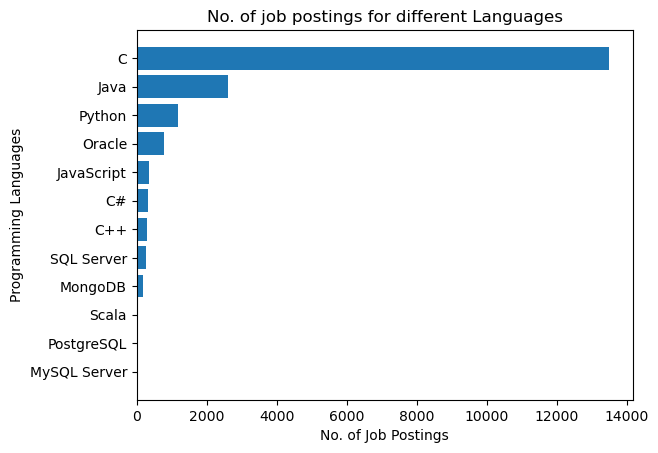

In [84]:
import matplotlib.pyplot as plt
df_new.sort_values("No. of Job Postings", ascending = True)
y = df_new["No. of Job Postings"]
x = df_new["Location"]
plt.barh(x,y)
plt.ylabel("Programming Languages")
plt.xlabel("No. of Job Postings")
plt. title("No. of job postings for different Languages")
#df_new["No. of Job Postings"].plot(kind = "barh")
plt.show()

## Author


Ayushi Jain


### Other Contributors


Rav Ahuja

Lakshmi Holla

Malika


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- | 
| 2022-01-19        | 0.3     | Lakshmi Holla        | Added changes in the markdown      |
| 2021-06-25        | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2022 IBM Corporation. All rights reserved. 
